#MXNet (From Scratch)

In [0]:
import mxnet as mx
from mxnet import nd
import matplotlib.pyplot as plt

ctx = mx.gpu()

##Getting the data

In [0]:
mnist = mx.gluon.data.vision.MNIST()

(28, 28)


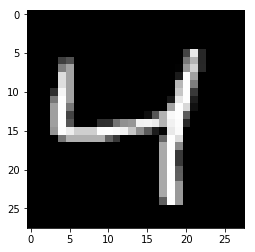

In [3]:
image, _ = mnist[2]

image = image.flatten().astype('float32').as_in_context(ctx)

print(image.shape)

plt.imshow(image.asnumpy(), cmap = 'gray')
plt.show()

In [0]:
def convolution_with_strides(inputs, kernal, strides):
    filter_hight, filter_width = kernal.shape
    hight, width = ((inputs.shape[0] - filter_hight)/strides[0]) + 1, ((inputs.shape[1] - filter_width)/strides[1]) + 1
    
    layer = nd.zeros((int(hight), int(width)))
    
    row = 0
    for i in range(0, inputs.shape[0], strides[0]):
        col = 0
        for j in range(0, inputs.shape[1], strides[1]):
            if (i + filter_hight <= inputs.shape[0]) and (j + filter_width <= inputs.shape[1]):
                layer[row, col] = (inputs[i:i + filter_hight, j:j + filter_width] * kernal).sum()
            col += 1
        row += 1
    return layer

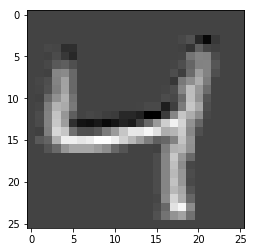

(26, 26)

In [5]:
kernal = nd.random.normal(0, 1, (3, 3)).as_in_context(ctx)

output = convolution_with_strides(image, kernal, strides = (1, 1))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

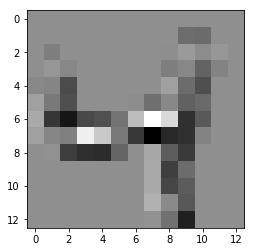

(13, 13)

In [6]:
kernal = nd.random.normal(0, 1, (4, 4)).as_in_context(ctx)

output = convolution_with_strides(image, kernal, strides = (2, 2))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

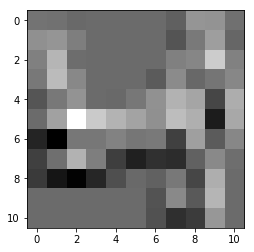

(11, 11)

In [7]:
kernal = nd.random.normal(0, 1, (7, 7)).as_in_context(ctx)

output = convolution_with_strides(image, kernal, strides = (2, 2))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape